In [1]:
import numpy as Np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #to help convert text in feature vectors to help read the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

Importing Data & Preprocessing Data

In [2]:
raw_mail = pd.read_csv('mail_data.csv')

In [3]:
raw_mail.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
mail_data = raw_mail.where((pd.notnull(raw_mail)),'') #replacing null values with a empty string

In [5]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail_data.shape

(5572, 2)

In [7]:
#Labelling spam as 1 & non-spam as 0
mail_data.loc[mail_data['Category'] == 'spam', 'Category',]=1
mail_data.loc[mail_data['Category'] == 'ham', 'Category',]=0


In [8]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


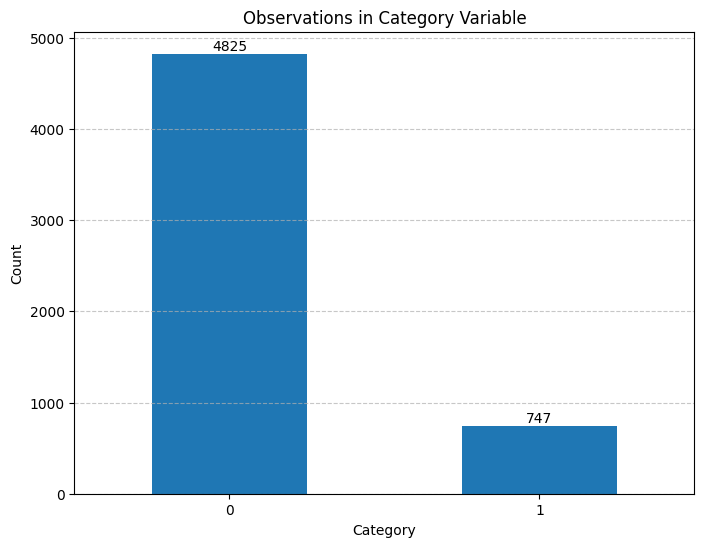

In [9]:
#category distribution

class_counts = mail_data['Category'].value_counts()


# Plotting
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar')

# Adding data labels directly on top of each bar
for i, v in enumerate(class_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Observations in Category Variable')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


ML Model Building

In [10]:
# Splitting the data into features (X) and target variable (y)
x = mail_data['Message']
y = mail_data['Category']


In [11]:
#Splitting data into training & testing
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.3, random_state=22)


In [12]:
#converting Y_train & Y_test values as int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Feature Extraction

In [13]:
#transforming the text data to feature vectors

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [14]:
print(X_train_features)

  (0, 5662)	0.3147340831689681
  (0, 1595)	0.39021409953892183
  (0, 4095)	0.4162379982102887
  (0, 4929)	0.4162379982102887
  (0, 4795)	0.40158209851626003
  (0, 2657)	0.35004631331562774
  (0, 2170)	0.2360913133179244
  (0, 3084)	0.25025498909279037
  (1, 4881)	0.5739622917376125
  (1, 6069)	0.8188817299606262
  (2, 5846)	0.4976585090813201
  (2, 2073)	0.5313203053447872
  (2, 2864)	0.42771971066599873
  (2, 4671)	0.37985132869817184
  (2, 2069)	0.37789358113271415
  (3, 2815)	0.5864446492955185
  (3, 6487)	0.5587175911185474
  (3, 5304)	0.5864446492955185
  (4, 5400)	0.4150880609626514
  (4, 5180)	0.435687324343345
  (4, 1839)	0.3300433043148905
  (4, 2253)	0.435687324343345
  (4, 6342)	0.35392138495637443
  (4, 5315)	0.26374664431048617
  (4, 4596)	0.37987338761983325
  :	:
  (3897, 4977)	0.21540092192911692
  (3897, 2662)	0.1731592883710168
  (3897, 4648)	0.1680923025891176
  (3897, 836)	0.22708139354905207
  (3897, 3330)	0.23536882005170626
  (3897, 2577)	0.16147881675108167
  (3

Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating Model

In [37]:
#evaluating on the training data
y_pred = model.predict(X_train_features)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_train, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, precision, accuracy and AUROC
x_probability = model.predict_proba(X_train_features)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(Y_train, x_probability)  # Generate ROC curve
roc_aucx = auc(fpr, tpr)  # Calculate AUROC

precisionx = precision_score(Y_train, y_pred, average='binary')

accuracyx = accuracy_score(Y_train, y_pred)

recallx = recall_score(Y_train, y_pred)



Confusion Matrix:
[[3368    3]
 [ 133  396]]


In [38]:
#print the performance metrics
print("Accuracy:", accuracyx)
print("AUROC:", roc_aucx)
print("Precision:", precisionx)
print("Recall:", recallx)


Accuracy: 0.9651282051282051
AUROC: 0.9979711303854347
Precision: 0.9924812030075187
Recall: 0.7485822306238186


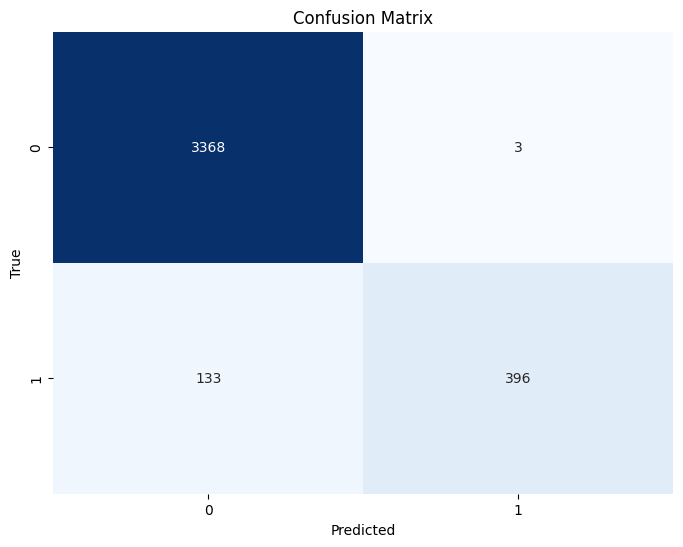

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


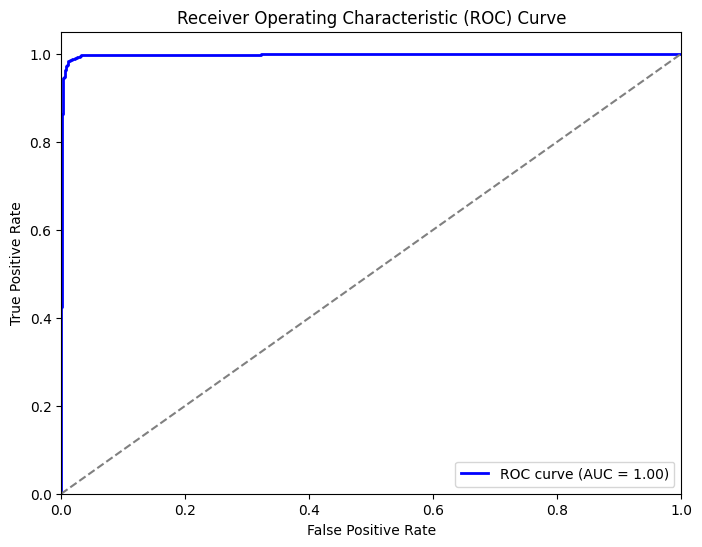

In [40]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_aucx)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
#predictions on the test data
y_pred = model.predict(X_test_features)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, precision, accuracy and AUROC
y_probability = model.predict_proba(X_test_features)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_probability)  # Generate ROC curve
roc_auc = auc(fpr, tpr)  # Calculate AUROC

precision = precision_score(Y_test, y_pred, average='binary')

accuracy = accuracy_score(Y_test, y_pred)

recall = recall_score(Y_test, y_pred)

Confusion Matrix:
[[1452    2]
 [  64  154]]


In [42]:
#print the performance metrics
print("Accuracy:", accuracy)
print("AUROC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9605263157894737
AUROC: 0.9914140681195815
Precision: 0.9871794871794872
Recall: 0.7064220183486238


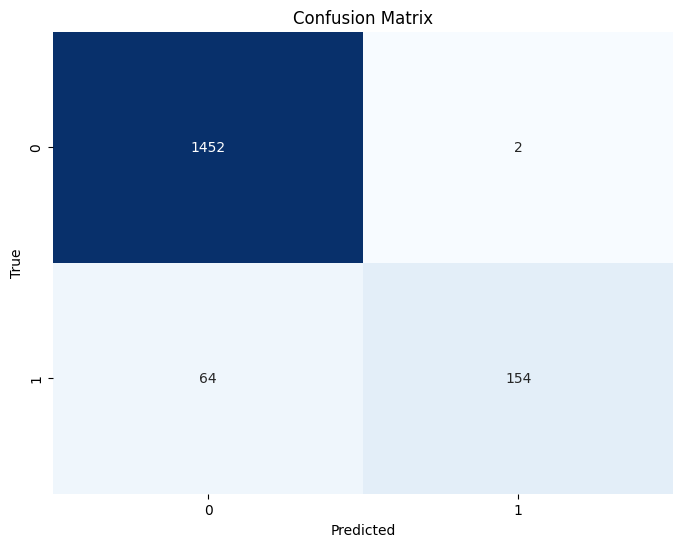

In [43]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


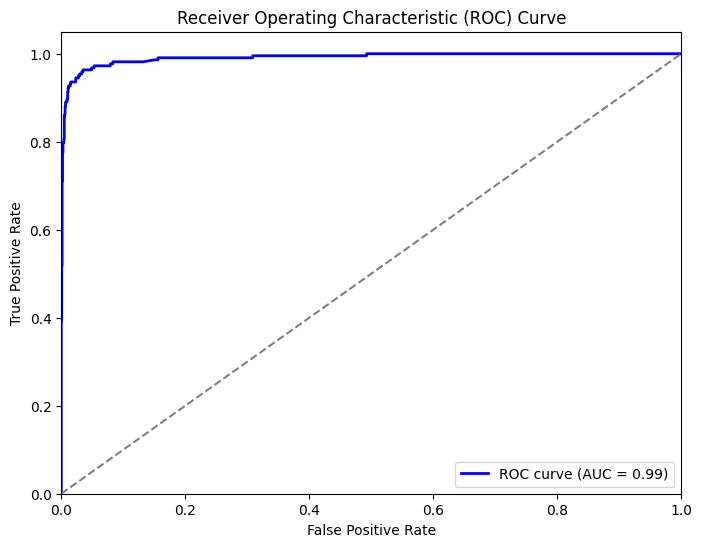

In [44]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

x = mail_data['Message']
y = mail_data['Category']

#Splitting data into training & testing
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.3, random_state=22)

#converting Y_train & Y_test values as int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')



In [46]:
#transforming the text data to feature vectors

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [47]:
# Applying SMOTE to the training set
smote = SMOTE(random_state=22)
X_train_features_resampled, y_train_resampled = smote.fit_resample(X_train_features, Y_train)


In [48]:
y_train_resampled.shape

(6742,)

In [49]:
# Observations after applying sampling
category_counts = pd.Series(y_train_resampled).value_counts()

# Display
print("Category counts:")
print(category_counts)


Category counts:
Category
0    3371
1    3371
Name: count, dtype: int64


In [50]:
model1 = LogisticRegression()
model1.fit(X_train_features_resampled, y_train_resampled)

LogisticRegression()

In [51]:
#predictions on the test data
y_pred = model1.predict(X_test_features)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity, specificity, precision, accuracy and AUROC
y_probability = model1.predict_proba(X_test_features)[:, 1]  # Get probabilities for positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_probability)  # Generate ROC curve
roc_auc_smote = auc(fpr, tpr)  # Calculate AUROC

precision_smote = precision_score(Y_test, y_pred, average='binary')

accuracy_smote = accuracy_score(Y_test, y_pred)

recall_smote = recall_score(Y_test, y_pred)

Confusion Matrix:
[[1443   11]
 [  23  195]]


In [52]:
#print the performance metrics
print("Accuracy:", accuracy_smote)
print("AUROC:", roc_auc_smote)
print("Precision:", precision_smote)
print("Recall:", recall_smote)

Accuracy: 0.9796650717703349
AUROC: 0.9923794530747195
Precision: 0.9466019417475728
Recall: 0.8944954128440367


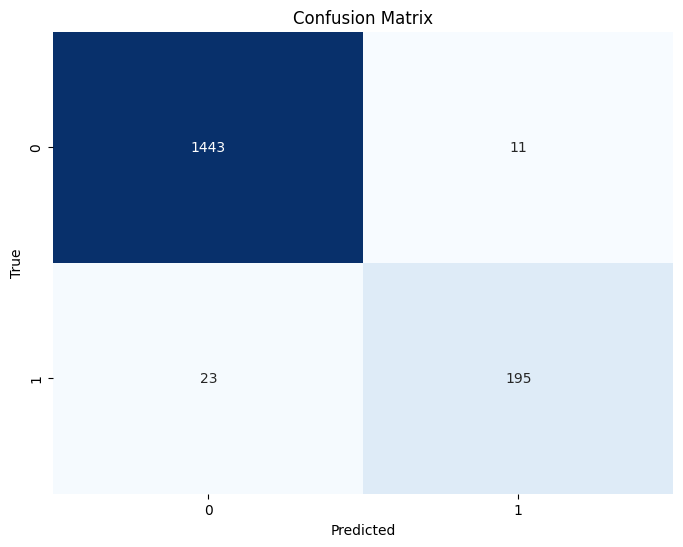

In [53]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


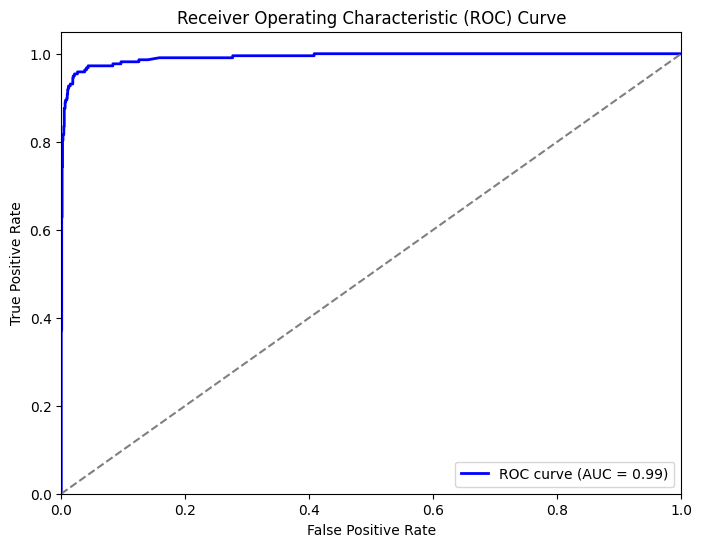

In [54]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comparing the accuracy, percison, & recall with & without SMOTE

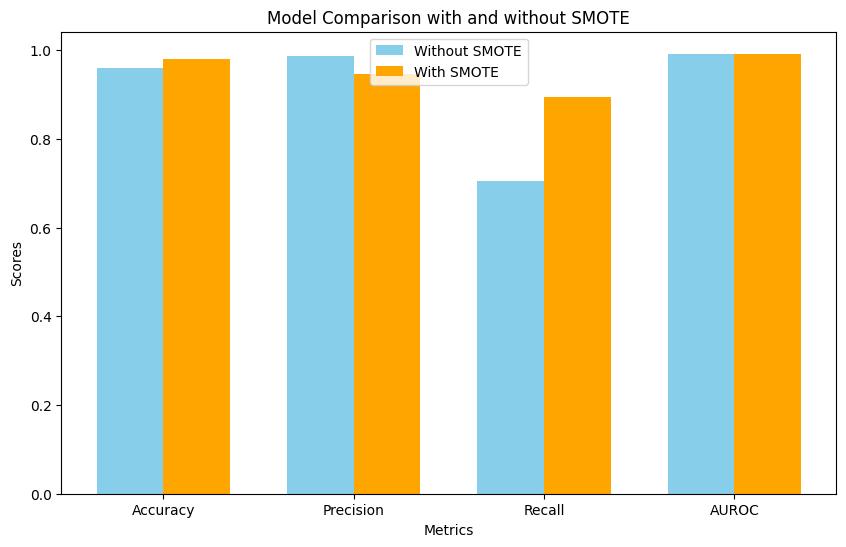

In [55]:
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'AUROC']

without_SMOTE = [accuracy, precision, recall, roc_auc]  # Scores without SMOTE
with_SMOTE = [accuracy_smote, precision_smote, recall_smote, roc_auc_smote]  # Scores with SMOTE

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(metrics))

bar1 = ax.bar(index - bar_width/2, without_SMOTE, bar_width, label='Without SMOTE', color='skyblue')
bar2 = ax.bar(index + bar_width/2, with_SMOTE, bar_width, label='With SMOTE', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison with and without SMOTE')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

Building a Predictive system

In [56]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! Click on the link provided below"]

# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_mail_features)
print(prediction)


if (prediction[0]==1):
  print('Spam mail')

else:
  print('Geniune mail')

[1]
Spam mail


Conclusion & Key Take aways

In this project, logistic regression was employed to construct a email spam prediction model. The exploratory data analysis revealed an imbalance in the original dataset's outcome variable, with 4825 observations classified as genuine and 747 as spam emails. To address this issue, the SMOTE oversampling technique was implemented, resulting in a more balanced dataset with 3371 observations for each class.

Upon comparing performance metrics, it was observed that the model with SMOTE exhibited slightly higher accuracy and recall, albeit with a slight decline in precision. Remarkably, the AUROC curve performance remained consistent despite the oversampling. 

A higher recall would assist us in identifying all the spam emails, while a higher precision indicates how effectively the model performed with respect to the positive classes. Depending on the business objective, we can choose a metric that offers the most value and cost benefit.

Furthermore, I created a predictive system to classify emails as spam or genuine based on user input. However, it is essential to note that the training data's size may limit the model's ability to accurately predict all spam emails. To improve real-time prediction accuracy, continuous training with larger datasets is recommended.

In summary, the study underscores the effectiveness of logistic regression in spam detection and highlights the importance of addressing class imbalance through techniques like SMOTE. Additionally, ongoing efforts to enhance the model's predictive capabilities with larger datasets are crucial for achieving more accurate results in real-time spam detection scenarios.